In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('EnergyEfficiency_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


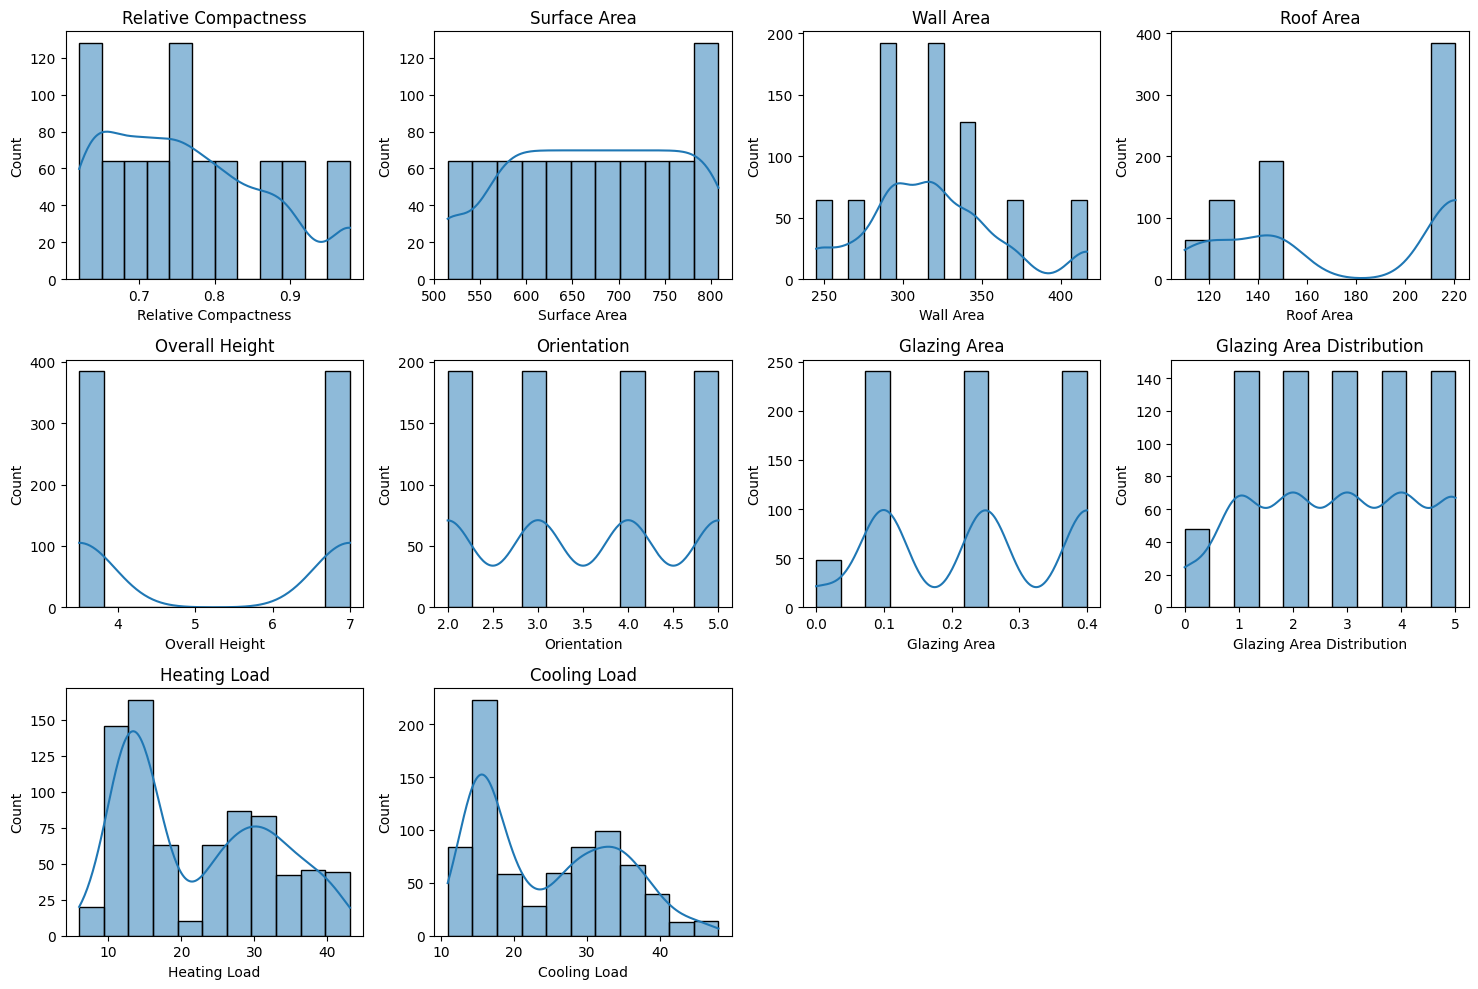

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

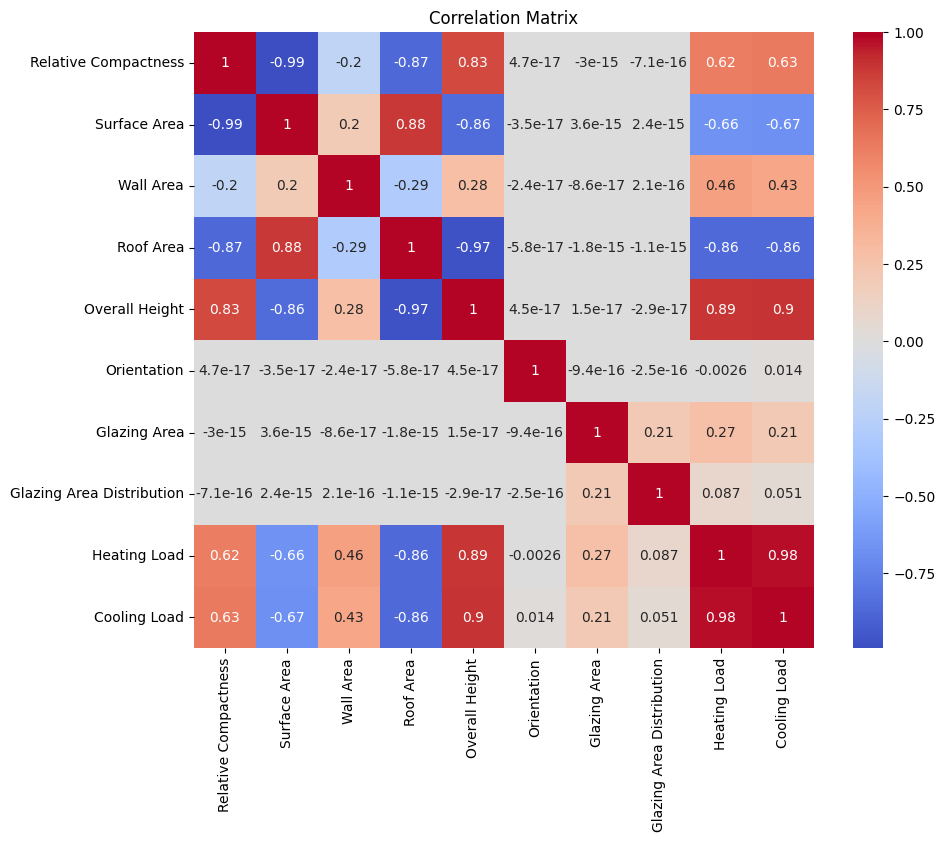

In [8]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Prepare data
X = df.drop(['Heating Load', 'Cooling Load'], axis=1)
y = df[['Heating Load', 'Cooling Load']]

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Build FNN model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(2)  # Two outputs: Heating Load and Cooling Load
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

In [13]:
model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,218 (12.57 KB)

 Trainable params: 3,218 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [15]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 626.4885 - mae: 23.0332 - val_loss: 592.0996 - val_mae: 22.4093
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 652.3597 - mae: 23.5216 - val_loss: 572.5992 - val_mae: 21.9595
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 616.9576 - mae: 22.8004 - val_loss: 534.8309 - val_mae: 21.0807
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 561.2472 - mae: 21.5912 - val_loss: 455.2797 - val_mae: 19.1649
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 472.4770 - mae: 19.3927 - val_loss: 311.5020 - val_mae: 15.2353
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 295.2831 - mae: 14.4888 - val_loss: 140.6644 - val_mae: 9.1012
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 141.6203 - mae: 8.7196 - val_loss: 71.3470 - val_mae: 5.8102
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 70.8223 - mae: 6.0168 - val_loss: 54.6271 - val_mae: 4.8229
Epoch 9/200
16/1

In [16]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.title('Training and Validation MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

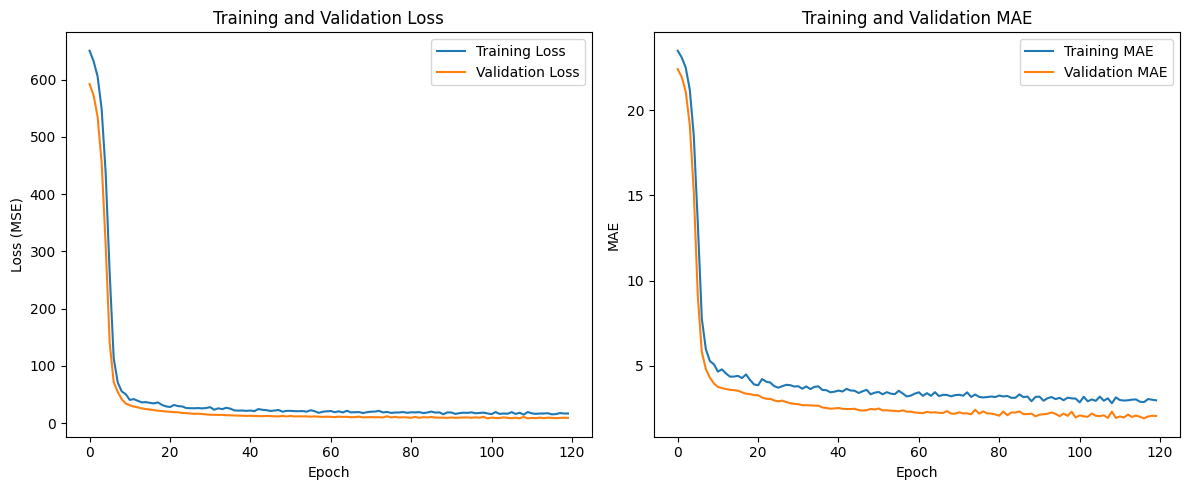

In [17]:
plot_history(history)

In [18]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculate metrics for each output
    metrics = {}
    for i, output in enumerate(['Heating Load', 'Cooling Load']):
        mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
        mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])

        metrics[output] = {
            'MSE': mse,
            'RMSE': np.sqrt(mse),
            'MAE': mae,
            'R2 Score': r2
        }

    # Print metrics
    for output, metric in metrics.items():
        print(f"\nMetrics for {output}:")
        for name, value in metric.items():
            print(f"{name}: {value:.4f}")

    # Plot predictions vs actual
    plt.figure(figsize=(12, 5))
    for i, output in enumerate(['Heating Load', 'Cooling Load']):
        plt.subplot(1, 2, i+1)
        plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.5)
        plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--')
        plt.xlabel(f'Actual {output}')
        plt.ylabel(f'Predicted {output}')
        plt.title(f'Actual vs Predicted {output}')
    plt.tight_layout()
    plt.show()

    return metrics

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Metrics for Heating Load:
MSE: 7.6898
RMSE: 2.7731
MAE: 1.9043
R2 Score: 0.9262

Metrics for Cooling Load:
MSE: 8.6854
RMSE: 2.9471
MAE: 2.0180
R2 Score: 0.9063


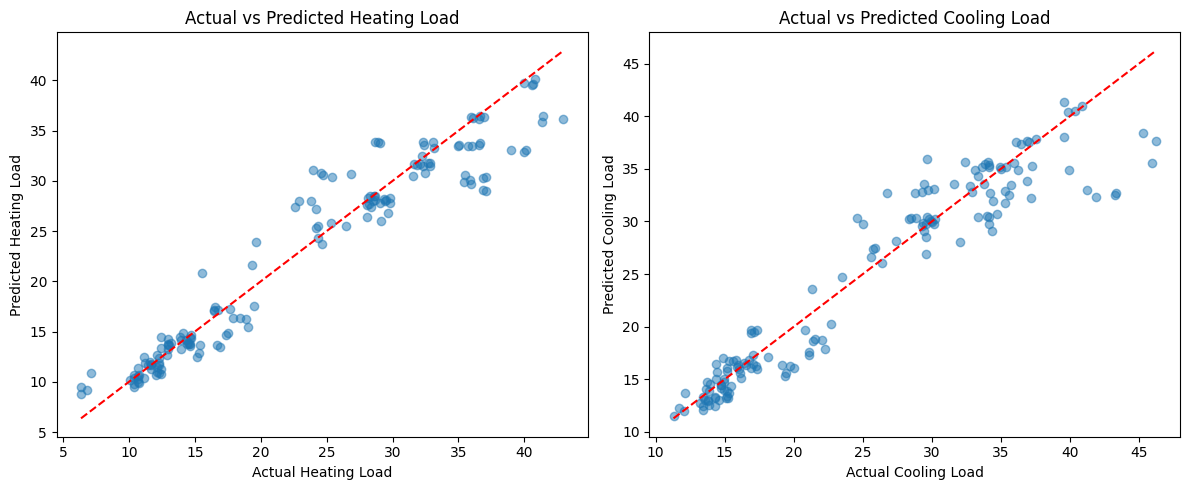

In [19]:
metrics = evaluate_model(model, X_test_scaled, y_test)